In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras 

In [4]:
keras.__version__

'2.10.0'

In [5]:
tf.__version__

'2.10.0'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test, y_test) = fashion_mnist.load_data()

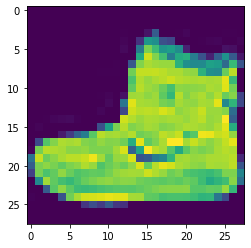

In [7]:
#to view the data use plt.imshow
plt.imshow(X_train_full[0])

In [8]:
y_train_full[1]

0

In [9]:
class_names = ["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

# Data Reshape

In [11]:
#CNN needs three dimensional array, width,height and channels
X_train_full = X_train_full.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))


# NORMALIZING OUR DATA

In [13]:
X_train_n = X_train_full/255.0
X_test_n = X_test / 255.0

# SPLIT THE DATA INTO TRAIN/VALIDATION/TEST DATASETS

In [14]:
X_valid, X_train = X_train_n[:5000],X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

# Create a Model Architecture

In [15]:
np.random.seed(42)
tf.random.set_seed(42)

# Architecture

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3),strides=1, padding= 'valid', activation='relu', input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                      

In [19]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "sgd", metrics =["accuracy"])

In [20]:
model_history = model.fit(X_train,y_train,epochs=10,batch_size=64, validation_data=(X_valid,y_valid))

Epoch 1/10
860/860 [==============================] - 13s 15ms/step - loss: 0.8383 - accuracy: 0.7159 - val_loss: 0.7520 - val_accuracy: 0.7348
Epoch 2/10
860/860 [==============================] - 13s 15ms/step - loss: 0.5280 - accuracy: 0.8087 - val_loss: 0.4890 - val_accuracy: 0.8176
Epoch 3/10
860/860 [==============================] - 14s 16ms/step - loss: 0.4712 - accuracy: 0.8296 - val_loss: 1.0440 - val_accuracy: 0.6822
Epoch 4/10
860/860 [==============================] - 13s 15ms/step - loss: 0.4352 - accuracy: 0.8445 - val_loss: 0.4026 - val_accuracy: 0.8620
Epoch 5/10
860/860 [==============================] - 13s 15ms/step - loss: 0.4118 - accuracy: 0.8529 - val_loss: 0.4156 - val_accuracy: 0.8508
Epoch 6/10
860/860 [==============================] - 12s 15ms/step - loss: 0.3883 - accuracy: 0.8600 - val_loss: 0.3693 - val_accuracy: 0.8702
Epoch 7/10
860/860 [==============================] - 12s 14ms/step - loss: 0.3717 - accuracy: 0.8661 - val_loss: 0.4000 - val_accuracy:

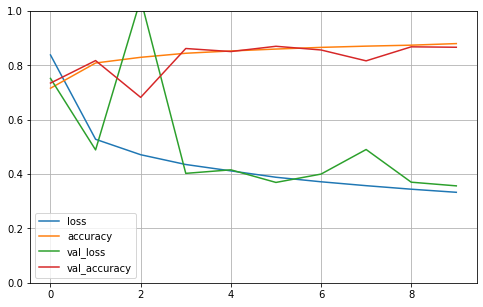

In [21]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

In [22]:
#to check convergence and increase the accuracy, incraese the Epochs
model_history = model.fit(X_train,y_train,epochs=20,batch_size=64, validation_data=(X_valid,y_valid))

Epoch 1/20
860/860 [==============================] - 11s 13ms/step - loss: 0.3217 - accuracy: 0.8829 - val_loss: 0.3548 - val_accuracy: 0.8674
Epoch 2/20
860/860 [==============================] - 11s 13ms/step - loss: 0.3113 - accuracy: 0.8867 - val_loss: 0.3367 - val_accuracy: 0.8776
Epoch 3/20
860/860 [==============================] - 11s 13ms/step - loss: 0.3035 - accuracy: 0.8893 - val_loss: 0.5782 - val_accuracy: 0.7996
Epoch 4/20
860/860 [==============================] - 11s 13ms/step - loss: 0.2948 - accuracy: 0.8931 - val_loss: 0.3110 - val_accuracy: 0.8878
Epoch 5/20
860/860 [==============================] - 11s 13ms/step - loss: 0.2896 - accuracy: 0.8946 - val_loss: 0.3057 - val_accuracy: 0.8890
Epoch 6/20
860/860 [==============================] - 11s 13ms/step - loss: 0.2802 - accuracy: 0.8976 - val_loss: 0.2972 - val_accuracy: 0.8938
Epoch 7/20
860/860 [==============================] - 11s 12ms/step - loss: 0.2735 - accuracy: 0.9006 - val_loss: 0.3143 - val_accuracy:

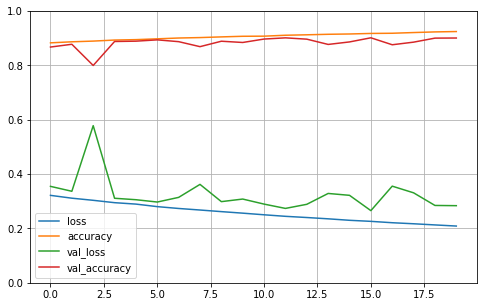

In [23]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show()

In [24]:
ev = model.evaluate(X_test_n,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2918 - accuracy: 0.8954


In [25]:
ev

[0.29181990027427673, 0.8953999876976013]

In [26]:
X_new = X_test[:3]

In [30]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 16ms/step


array([9, 2, 1], dtype=int64)

In [29]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


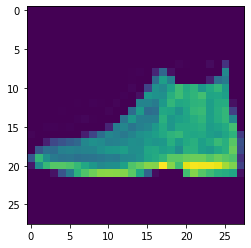

In [31]:
print(plt.imshow(X_test[0].reshape(28,28)))